In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Download the Apple stock dataset here
#url = "https://drive.google.com/file/d/1CwJNy5pBb9WkZfzSETxFsA5UtOZ9Hzbi/view?usp=share_link"

## **Preprocessing**

In [3]:
# install the plotly library 
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Import libraries

import os 
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Import the necessary libraries
import math
import seaborn as sns
import datetime as dt
from datetime import datetime  
from itertools import cycle  
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
%matplotlib inline
plt.style.use("ggplot")

from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Reshape, Flatten, TimeDistributed, Conv1D, MaxPooling1D, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [6]:
# Load and read the data 
data = pd.read_csv("/content/drive/MyDrive/AAPL (1).csv")

In [7]:
# View the first 5 items on our dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-04-04,0.259286,0.261964,0.256964,0.257321,0.219011,146020000
1,2003-04-07,0.265179,0.266964,0.257321,0.258750,0.220227,196862400
2,2003-04-08,0.259107,0.261607,0.256429,0.258036,0.219619,128934400
3,2003-04-09,0.259286,0.261071,0.252500,0.253393,0.215667,146725600
4,2003-04-10,0.253571,0.256964,0.253571,0.256607,0.218403,107100000


In [8]:
# view the last 5 items on our dataset 
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5029,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
5030,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
5031,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
5032,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700
5033,2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56933100


In [9]:
# Change the cases for the column names for simplicity in proceeding with the code
data.columns = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume' ]

In [10]:
# Get the summary satistics of the dataset
data.describe()

,open,high,low,close,adjclose,volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,36.185599,36.597889,35.785162,36.208358,34.805850,4.162790e+08
std,46.192491,46.771308,45.649860,46.236882,46.196370,3.935487e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,4.573125,4.651160,4.469822,4.551875,3.874185,1.261293e+08
50%,18.965894,19.121607,18.779999,18.965536,16.600392,2.853582e+08
75%,43.009376,43.358125,42.600000,42.996251,41.097492,5.838686e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,3.372970e+09


In [11]:
# Checking null value
data.isnull().sum()

date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64

In [12]:
# Checking Data type of each column
print("Date column data type: ", type(data['date'][0]))
print("Open column data type: ", type(data['open'][0]))
print("Close column data type: ", type(data['close'][0]))
print("High column data type: ", type(data['high'][0]))
print("Low column data type: ", type(data['low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


In [13]:
# Convert the date colume to datetime format
data['date'] = pd.to_datetime(data.date)
data.head()

,date,open,high,low,close,adjclose,volume
0,2003-04-04,0.259286,0.261964,0.256964,0.257321,0.219011,146020000
1,2003-04-07,0.265179,0.266964,0.257321,0.258750,0.220227,196862400
2,2003-04-08,0.259107,0.261607,0.256429,0.258036,0.219619,128934400
3,2003-04-09,0.259286,0.261071,0.252500,0.253393,0.215667,146725600
4,2003-04-10,0.253571,0.256964,0.253571,0.256607,0.218403,107100000


In [14]:
# sort the data by date
data.sort_values(by='date', inplace=True)
data.head()

,date,open,high,low,close,adjclose,volume
0,2003-04-04,0.259286,0.261964,0.256964,0.257321,0.219011,146020000
1,2003-04-07,0.265179,0.266964,0.257321,0.258750,0.220227,196862400
2,2003-04-08,0.259107,0.261607,0.256429,0.258036,0.219619,128934400
3,2003-04-09,0.259286,0.261071,0.252500,0.253393,0.215667,146725600
4,2003-04-10,0.253571,0.256964,0.253571,0.256607,0.218403,107100000


In [15]:
# check the shape of the data
data.shape

(5034, 7)

In [16]:
# Print the interval of the data 
print("Starting date: ",data.iloc[0][0])
print("Ending date: ", data.iloc[-1][0])
print("Duration: ", data.iloc[-1][0]-data.iloc[0][0])

Starting date:  2003-04-04 00:00:00
Ending date:  2023-04-03 00:00:00
Duration:  7304 days 00:00:00


In [17]:
closedf = data[['date','close']] #assign the data and close column to closedf
dataf = data[data["date"] > "2022-04-04"] # select dates from April 4th 2022
df = closedf[closedf['date'] > '2022-04-04'] # create the one year data from 4th April 2022
df_stock = df.copy()

In [20]:
# import the adfuller library
from statsmodels.tsa.stattools import adfuller

<ipython-input-21-6cf617ef5a3c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_stock['close'])


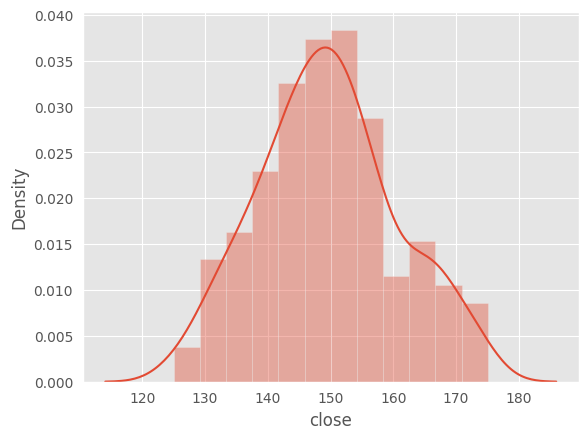

In [21]:
sns_plot = sns.distplot(df_stock['close'])
#sns_plot2 = sns.distplot(dataY['close'])

In [22]:
df_stock

,date,close
4784,2022-04-05,175.059998
4785,2022-04-06,171.830002
4786,2022-04-07,172.139999
4787,2022-04-08,170.089996
4788,2022-04-11,165.750000
...,...,...
5029,2023-03-28,157.649994
5030,2023-03-29,160.770004
5031,2023-03-30,162.360001
5032,2023-03-31,164.899994


<ipython-input-23-5ed7236e4815>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataf['close'], ax = ax[0,1])
<ipython-input-23-5ed7236e4815>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataf['open'], ax = ax[1,1])
<ipython-input-23-5ed7236e4815>:8: UserWarning: 

`distplot` is a deprecate

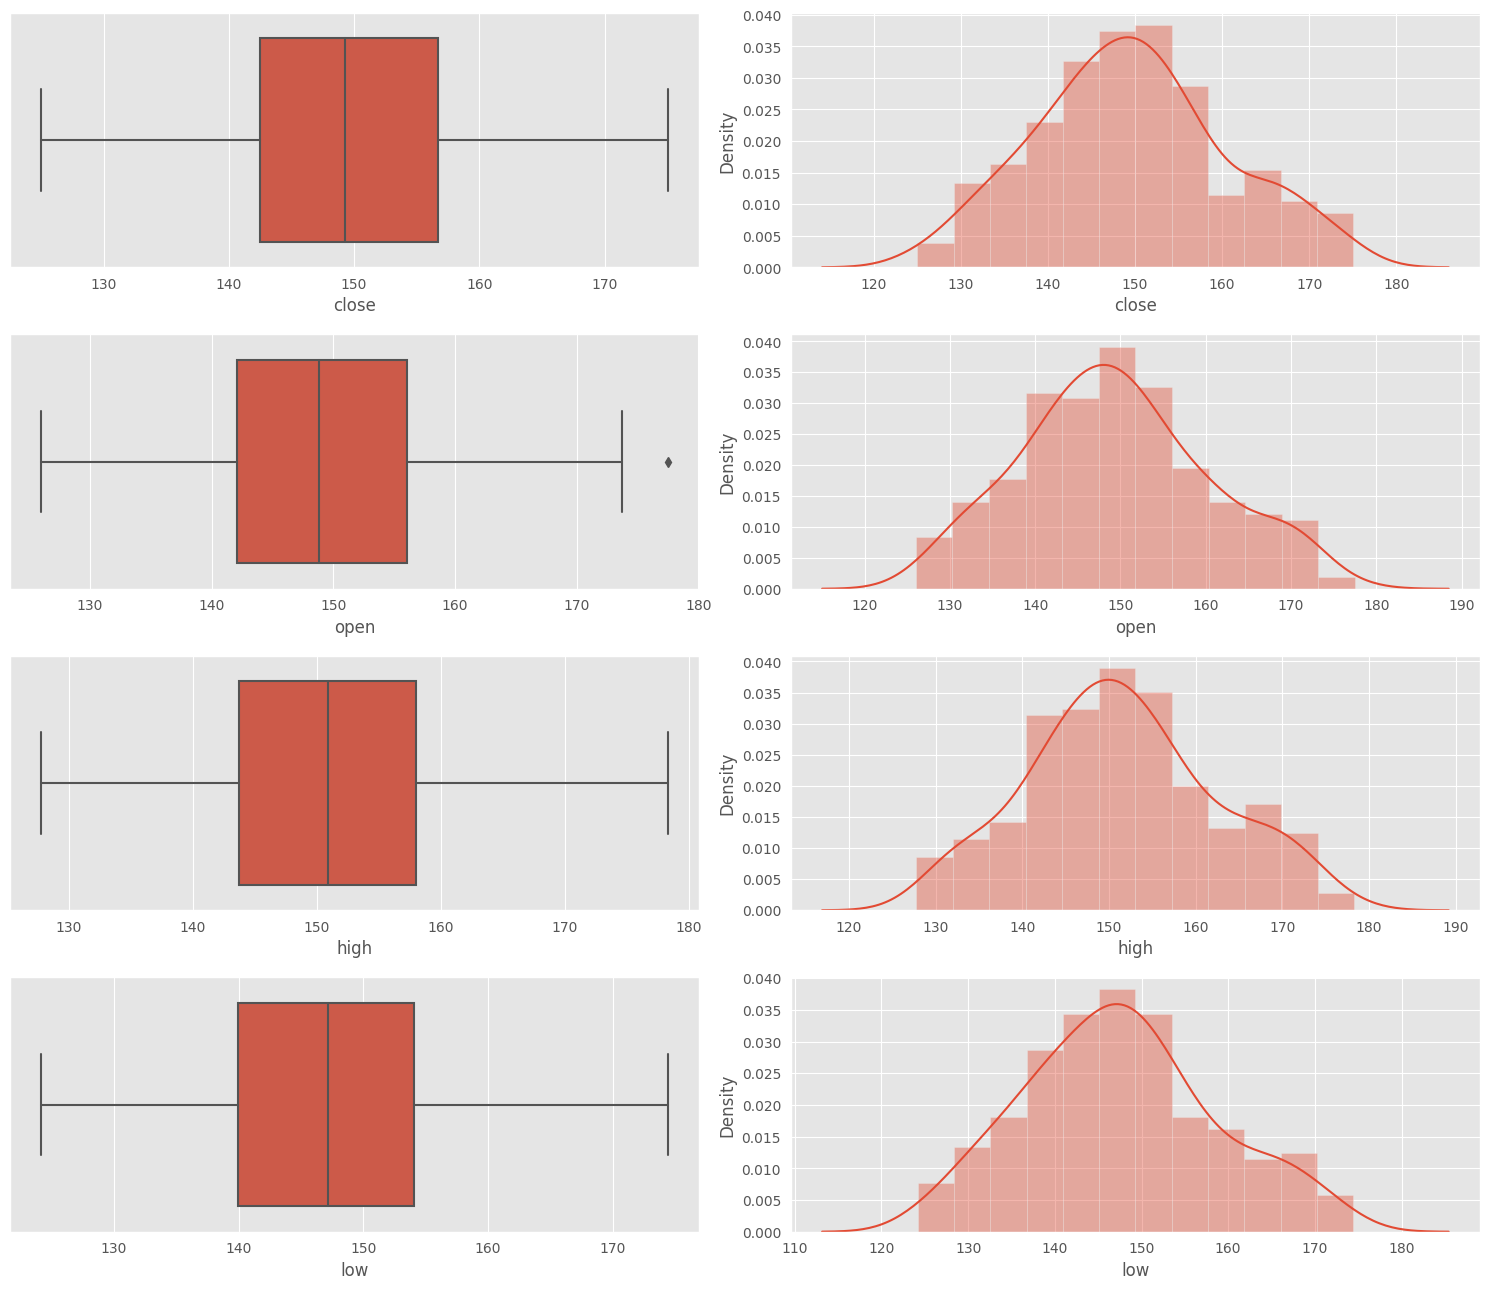

In [23]:
# Plot to visualize the density and spread of our dataset
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataf["close"], ax = ax[0,0])
sns.distplot(dataf['close'], ax = ax[0,1])
sns.boxplot(x= dataf["open"], ax = ax[1,0])
sns.distplot(dataf['open'], ax = ax[1,1])
sns.boxplot(x= dataf["high"], ax = ax[2,0])
sns.distplot(dataf['high'], ax = ax[2,1])
sns.boxplot(x= dataf["low"], ax = ax[3,0])
sns.distplot(dataf['low'], ax = ax[3,1])
plt.tight_layout()

<ipython-input-24-79df25da6462>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataf.corr(),cmap=plt.cm.Reds,annot=True)


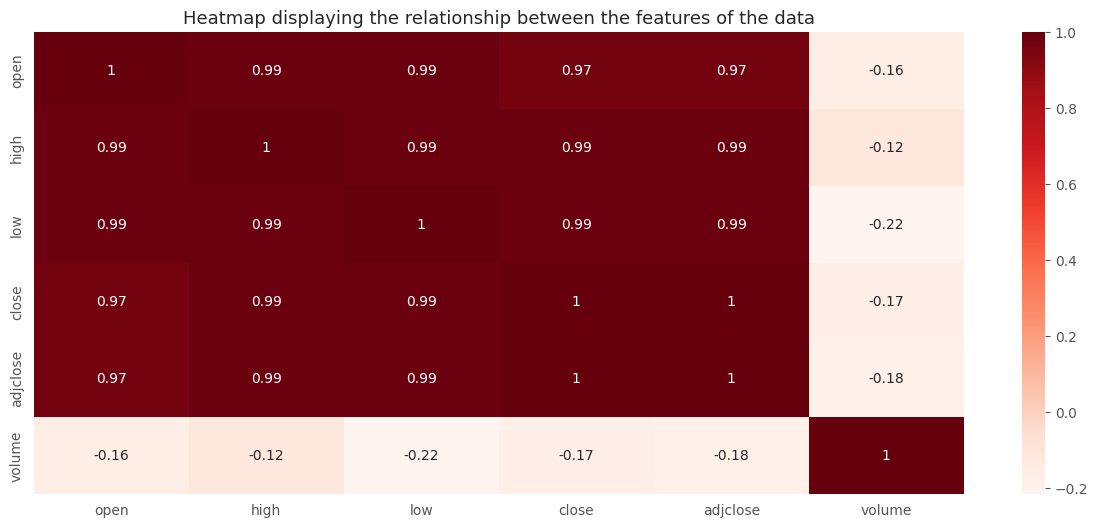

In [24]:
# plot the heat map to depict the correlation between features
plt.figure(figsize=(15,6))
sns.heatmap(dataf.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

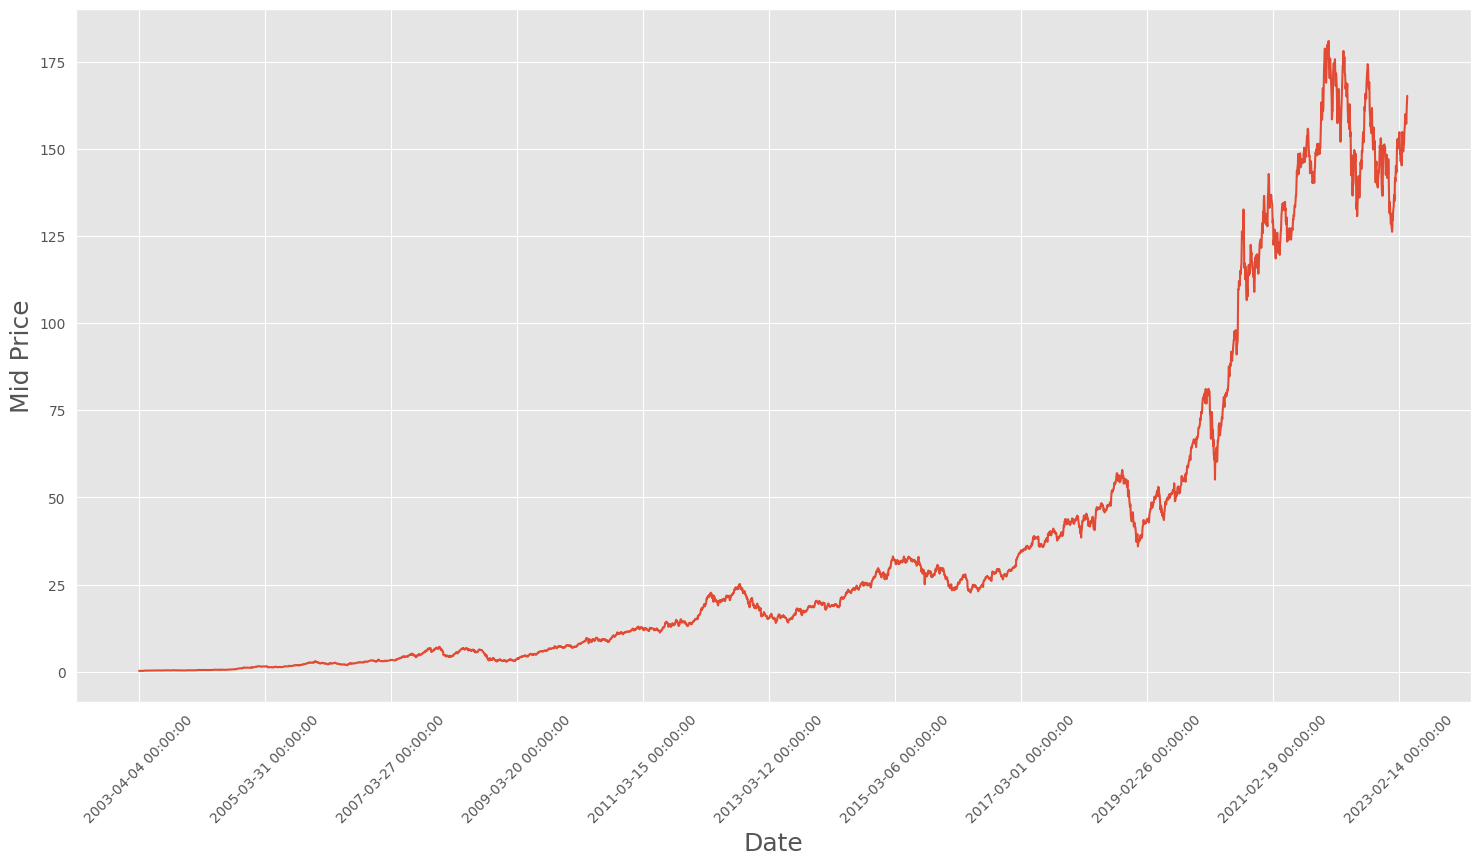

In [25]:
# plot a complete visualization of our data
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['low']+data['high'])/2.0)
plt.xticks(range(0,data.shape[0],500),data['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [26]:
# visualize the Apple stock price data for the last year 

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(dataf, dataf.date, y=[dataf['open'], dataf['close'], 
                                          dataf['high'], dataf['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Make Seperate dataset with closed price

In [30]:
# Consider only the last One year data for prediction 
df = closedf[closedf['date'] > '2022-04-04']
df_stock = df.copy()
print("Total data for prediction: ", df.shape[0])

Total data for prediction:  250


In [31]:
# Remove the data column because it's not needed in our analysis and normalize the data frame
del df['date']
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(250, 1)


In [32]:
# Prepare the Data for train and test
train_len=int(len(df)*0.65)
test_size=len(df)-train_len
train_data,test_data=df[0:train_len,:],df[train_len:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (162, 1)
test_data:  (88, 1)


In [33]:
# create a function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ##
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_x), np.array(data_y)

In [34]:
# Define the time step and create the train and test data
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [35]:
# Print the shape of the train and test data
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (146, 15)
y_train:  (146,)
X_test:  (72, 15)
y_test (72,)


In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (146, 15, 1)
X_test:  (72, 15, 1)


In [37]:
# reshape output to be [samples, features] which is required for LSTM
y_train =y_train.reshape(y_train.shape[0] , 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (146, 1)
y_test:  (72, 1)


## **ARIMA**

### **The Process**

In [ ]:
# install the pmdarima libraries
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the necessay libraries to run an ARIMA model
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: ylabel='Density'>

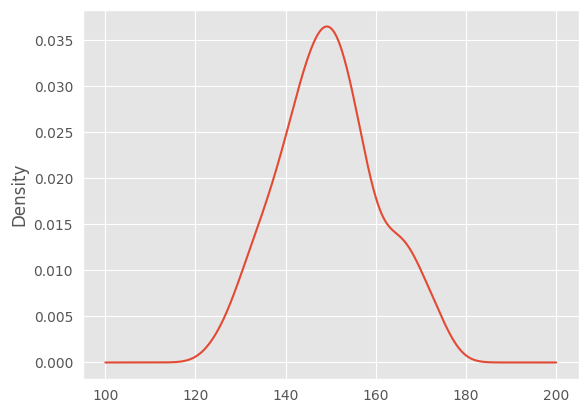

In [ ]:
#Distribution of the dataset

df_stock["close"].plot(kind='kde')

In [ ]:
#set date as the index column
closedf.set_index("date", inplace = True)
closedf

,close
date,
2003-04-04,0.257321
2003-04-07,0.258750
2003-04-08,0.258036
2003-04-09,0.253393
2003-04-10,0.256607
...,...
2023-03-28,157.649994
2023-03-29,160.770004
2023-03-30,162.360001


<function matplotlib.pyplot.show(close=None, block=None)>

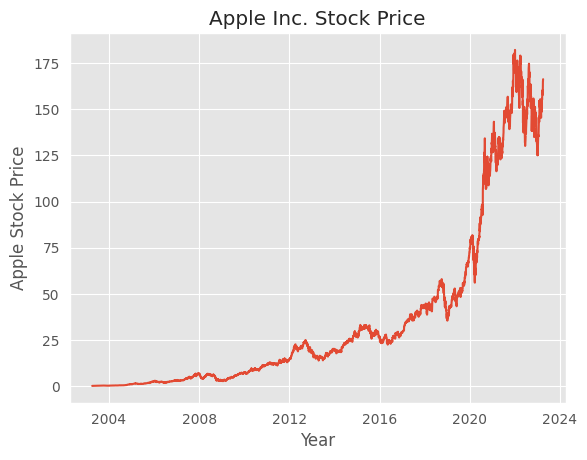

In [ ]:
# Plot and visualize the data
plt.plot(closedf)
plt.xlabel("Year")
plt.ylabel("Apple Stock Price")
plt.title("Apple Inc. Stock Price")
plt.show

In [ ]:
# Perform the differencing to remove the trend and seasonality
diff = closedf["close"].diff().dropna()

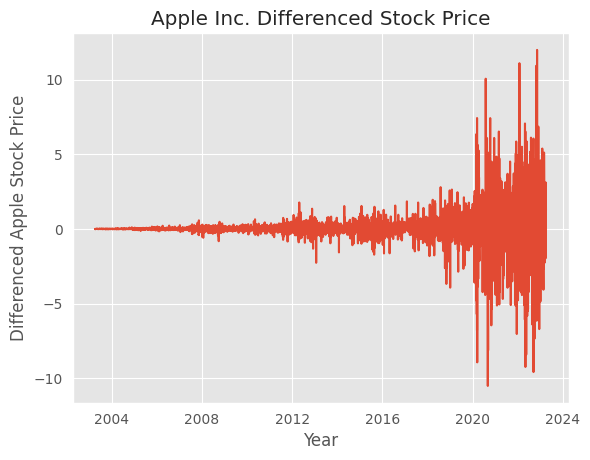

In [ ]:
# Plot the differenced data
plt.plot(diff)
plt.xlabel("Year")
plt.ylabel("Differenced Apple Stock Price")
plt.title("Apple Inc. Differenced Stock Price")
plt.show()

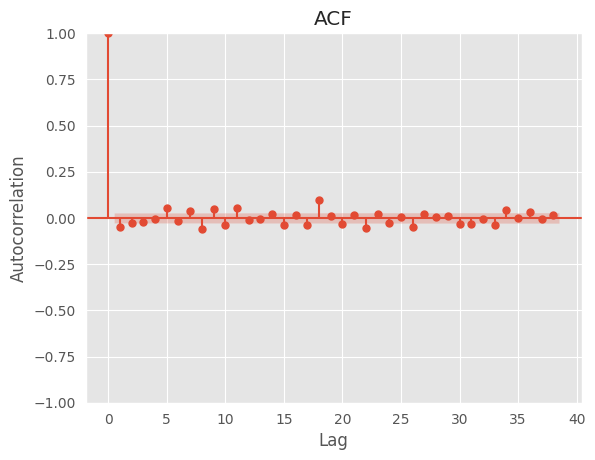

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



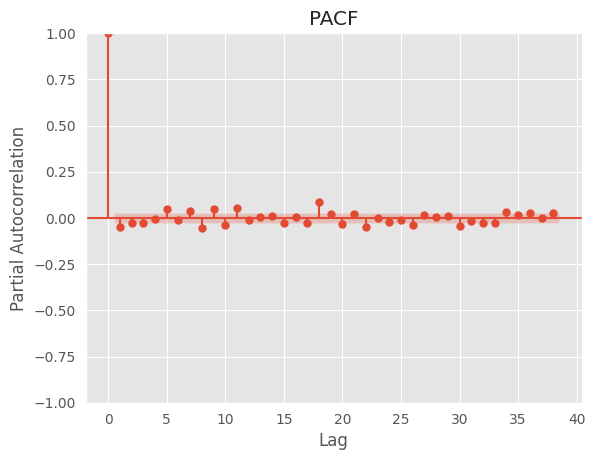

In [ ]:
# Plot the ACF and PACF to determine ARIMA model parameters
#plot ACF
plot_acf(diff)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("ACF")
plt.show()

#plot PACF
plot_pacf(diff)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("PACF")
plt.show()

In [ ]:
# Split the data into training and test sets
train = closedf.iloc[:-30]
test = closedf.iloc[-30:]

In [ ]:
# Define the ARIMA model
model = sm.tsa.ARIMA(train["close"], order = (1, 1, 1))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# Fit the model
results = model.fit()

In [ ]:
# predict the next 30 steps 
forecast = results.forecast(steps = 30)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# view the first 5 elements of the predicted values
forecast.head()

5004    152.631832
5005    152.662221
5006    152.673507
5007    152.677699
5008    152.679255
Name: predicted_mean, dtype: float64

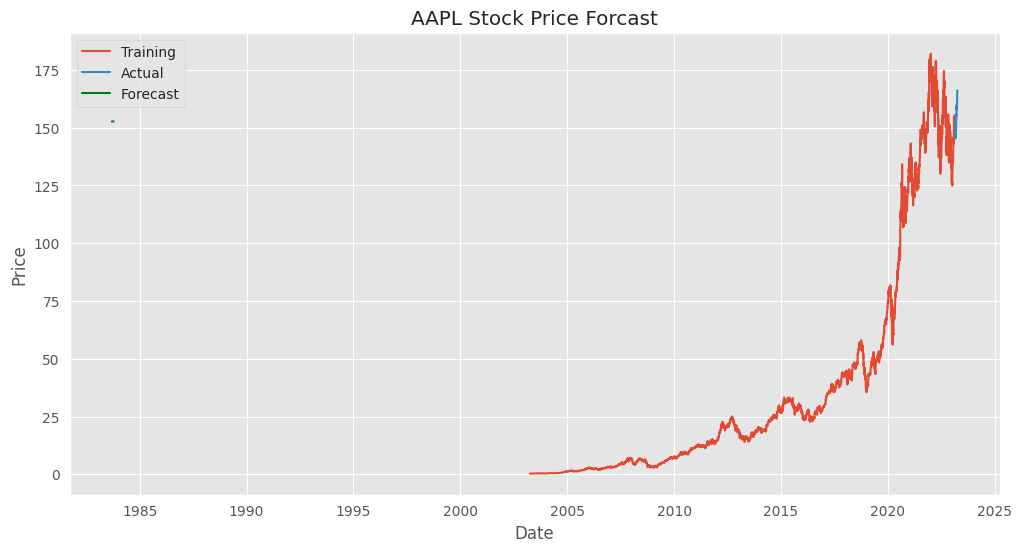

In [ ]:
#Plot the forecast

plt.figure(figsize = (12,6))
plt.plot(train["close"], label = "Training")
plt.plot(test["close"], label = "Actual")
plt.plot(forecast, color = "g", label = "Forecast")
plt.title("AAPL Stock Price Forcast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### **Model Evaluation**

In [ ]:
#Print the RMSE, MSE, and MAE
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(test["close"],forecast)))
print("MSE: ", mean_squared_error(test["close"],forecast))
print("MAE: ", mean_absolute_error(test["close"],forecast))

Test Data
RMSE:  5.805019023029424
MSE:  33.69824585773349
MAE:  4.803091476371119


In [ ]:
# Print the explained variance score
print("Test data explained variance score:", explained_variance_score(test["close"],forecast))

Test data explained variance score: 0.0008591663603366717


In [ ]:
# R-Squared score for regression 

print("Test data R2 score:", r2_score(test["close"],forecast))

#  The ARIMA model does not follow the trend of the data and is predicting worse than the mean of the target values (ˉy)

Test data R2 score: -0.05150115388000809


In [ ]:
# Print the deviance scores
print("Test")
print("Data MPD: ", mean_poisson_deviance(test["close"],forecast))
print("Data MGD: ", mean_gamma_deviance(test["close"],forecast))

Test
Data MPD:  0.21806393215292133
Data MGD:  0.0014117242630484158


## **GRU**

### **The Process**

In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, GRU, Dense, Dropout, Bidirectional, TimeDistributed, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
#Define the GRU model sequence
tf.keras.backend.clear_session()
model_gru=Sequential()
model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model_gru.add(GRU(32,return_sequences=True))
model_gru.add(GRU(16))
model_gru.add(Dropout(0.20))
model_gru.add(Dense(1, activation = "relu")) #add activation function
model_gru.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# view the model summary
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 12,113
Trainable params: 12,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model and assign it to history_gru
history_gru = model_gru.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32, verbose=1)

Epoch 1/200
5/5 [==============================] - 10s 523ms/step - loss: 0.1266 - val_loss: 0.0189
Epoch 2/200
5/5 [==============================] - 0s 70ms/step - loss: 0.0292 - val_loss: 0.0235
Epoch 3/200
5/5 [==============================] - 0s 52ms/step - loss: 0.0364 - val_loss: 0.0148
Epoch 4/200
5/5 [==============================] - 0s 38ms/step - loss: 0.0269 - val_loss: 0.0123
Epoch 5/200
5/5 [==============================] - 0s 39ms/step - loss: 0.0273 - val_loss: 0.0159
Epoch 6/200
5/5 [==============================] - 0s 40ms/step - loss: 0.0255 - val_loss: 0.0118
Epoch 7/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0180 - val_loss: 0.0101
Epoch 8/200
5/5 [==============================] - 0s 42ms/step - loss: 0.0189 - val_loss: 0.0101
Epoch 9/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0148 - val_loss: 0.0092
Epoch 10/200
5/5 [==============================] - 0s 45ms/step - loss: 0.0180 - val_loss: 0.0093
Epoch 11/200
5/5 

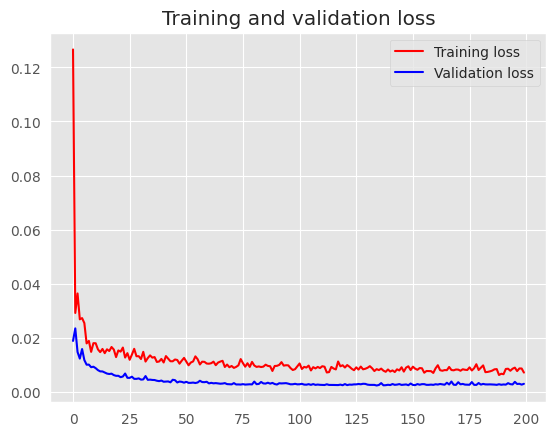

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation loss
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Make predictions
train_predict=model_gru.predict(X_train)
test_predict=model_gru.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 12ms/step


((146, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### **Model Evaluation**

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

Train Data
RMSE:  3.6620532415282976
MSE:  13.41063394378791
MAE:  2.8687215466141365
-------------------------------------------------------------------------------------
Test Data
RMSE:  2.7523215118203606
MSE:  7.575273704429114
MAE:  2.188075663397894


In [ ]:
# The VAriance Regression Score
print("Train data explained variance score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance score: 0.8737563878111584
Test data explained variance score: 0.9354351514308527


In [ ]:
# R-Squared score for regression 
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8679454428753872
Test data R2 score: 0.9329170093297308


In [ ]:
# The mean gamma deviance and mean poisson deviance scores
print("Train")
print("Data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))

print("----------------------------------------------------------------------")
print("Test")
print("Data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train
Data MGD:  0.0006006695025001431
Data MPD:  0.08959056689685348
----------------------------------------------------------------------
Test
Data MPD:  0.05270612091830726
Data MGD:  0.0003687665887483544


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Define the dataframe to plot
plotdf = pd.DataFrame({'date': df_stock['date'],
                       'original_close': df_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

# make your plottings 
fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


In [39]:
# Define the temp_input
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# view the temp_input
temp_input

[0.5509592016195204,
 0.5589529864317946,
 0.6161072818523725,
 0.5991207514164514,
 0.6470822612493548,
 0.6846523044633832,
 0.6556755464493293,
 0.677657780222666,
 0.7040368164660906,
 0.6646682920729754,
 0.6520782643469567,
 0.714428582845152,
 0.7462031025938627,
 0.7969623541774107,
 0.8223421298492775]

### **Predict the next 30 days**

In [ ]:
# Create a while loop to move predict the next 30 days
gru_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days): # while i is less than 30 
    
    if(len(temp_input)>time_step): #if the length of temp_input greater than the time_step(15)
        
        x_input=np.array(temp_input[1:]) # Convert to a numpy array
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1) # Reshape to a 1 x 14 array
        x_input = x_input.reshape((1, n_steps, 1)) # Reshape to a three dim
        
        yhat = model_gru.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        temp_input=temp_input[1:] # move the set one step forward
        #print(temp_input)
       
        gru_output.extend(yhat.tolist()) #add the predicted value to the gru_lstm_output
        i=i+1 # add 1 to i and perform the process over again
        
    else:  # the length of temp_input between 1 - 14
        
        x_input = x_input.reshape((1, n_steps,1))  #reshape the x_input into a 3 dim
        yhat = model_gru.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        
        gru_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(gru_output)) # Print the output of the length of gru_lstm_output

1 day input [0.55895299 0.61610728 0.59912075 0.64708226 0.6846523  0.65567555
 0.67765778 0.70403682 0.66466829 0.65207826 0.71442858 0.7462031
 0.79696235 0.82234213 0.78106135]
1 day output [[0.7427152]]
[0.5589529864317946, 0.6161072818523725, 0.5991207514164514, 0.6470822612493548, 0.6846523044633832, 0.6556755464493293, 0.677657780222666, 0.7040368164660906, 0.6646682920729754, 0.6520782643469567, 0.714428582845152, 0.7462031025938627, 0.7969623541774107, 0.8223421298492775, 0.7810613512992859, 0.7427151799201965]
2 day input [0.61610728 0.59912075 0.64708226 0.6846523  0.65567555 0.67765778
 0.70403682 0.66466829 0.65207826 0.71442858 0.7462031  0.79696235
 0.82234213 0.78106135 0.74271518]
2 day output [[0.70877856]]
[0.6161072818523725, 0.5991207514164514, 0.6470822612493548, 0.6846523044633832, 0.6556755464493293, 0.677657780222666, 0.7040368164660906, 0.6646682920729754, 0.6520782643469567, 0.714428582845152, 0.7462031025938627, 0.7969623541774107, 0.8223421298492775, 0.7810

In [ ]:
# visualize the output
gru_output

[[0.7810613512992859],
 [0.7427151799201965],
 [0.7087785601615906],
 [0.6756953001022339],
 [0.643373966217041],
 [0.6124075055122375],
 [0.5832171440124512],
 [0.5559892058372498],
 [0.5308787822723389],
 [0.5079962611198425],
 [0.48731696605682373],
 [0.4687687158584595],
 [0.45229560136795044],
 [0.4377627372741699],
 [0.4250282049179077],
 [0.4139409065246582],
 [0.4043233394622803],
 [0.3960084319114685],
 [0.3888407051563263],
 [0.3826760947704315],
 [0.37738341093063354],
 [0.37284499406814575],
 [0.3689568042755127],
 [0.3656274080276489],
 [0.3627772629261017],
 [0.360337495803833],
 [0.3582488000392914],
 [0.3564601540565491],
 [0.35492801666259766],
 [0.3536149561405182]]

In [ ]:
# Predict the next 30 days 

grudf=df.tolist() # Convert the datadrame to a list
grudf.extend((np.array(gru_output).reshape(-1,1)).tolist()) # Add the prediction for 30 days forward
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0] # Transform back to the real values before normalization

names = cycle(['Close price'])

fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## **LSTM**

### **The Process**

In [ ]:
# Build the Lstm model
tf.keras.backend.clear_session()
model_lstm=Sequential()
model_lstm.add(LSTM(64,return_sequences=True,input_shape=(time_step,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64,return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation = "relu"))
model_lstm.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# view the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
# fit the model
history_lstm = model_lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 8s 493ms/step - loss: 0.2070 - val_loss: 0.0502
Epoch 2/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0402 - val_loss: 0.0456
Epoch 3/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0445 - val_loss: 0.0285
Epoch 4/200
5/5 [==============================] - 0s 80ms/step - loss: 0.0370 - val_loss: 0.0314
Epoch 5/200
5/5 [==============================] - 0s 72ms/step - loss: 0.0330 - val_loss: 0.0235
Epoch 6/200
5/5 [==============================] - 0s 64ms/step - loss: 0.0319 - val_loss: 0.0242
Epoch 7/200
5/5 [==============================] - 0s 74ms/step - loss: 0.0300 - val_loss: 0.0236
Epoch 8/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0267 - val_loss: 0.0241
Epoch 9/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0271 - val_loss: 0.0225
Epoch 10/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0261 - val_loss: 0.0225
Epoch 11/200
5/5 [

In [ ]:
# convert the history to dataframe
pd.DataFrame(history_lstm.history)

,loss,val_loss
0,0.207034,0.050223
1,0.040206,0.045648
2,0.044522,0.028529
3,0.036975,0.031355
4,0.033005,0.023460
...,...,...
195,0.007781,0.004974
196,0.008232,0.005198
197,0.009725,0.005073
198,0.009939,0.004904


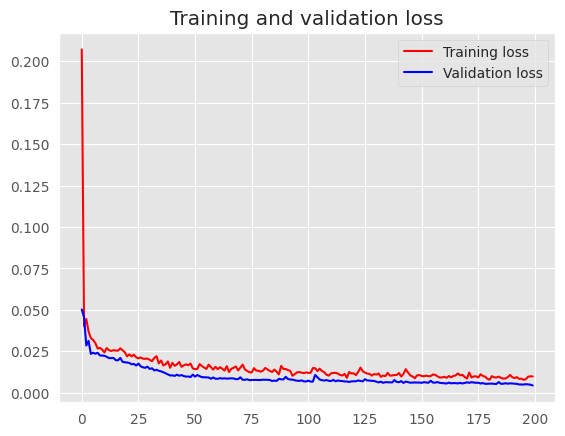

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the training and validation loss
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Prediction using lstm model
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 12ms/step


((146, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# view the predicted values
test_predict

array([[142.60762],
       [139.89008],
       [137.17815],
       [135.24585],
       [134.78506],
       [134.68398],
       [134.59128],
       [134.17236],
       [133.00385],
       [132.26628],
       [132.11122],
       [131.55267],
       [130.96867],
       [130.36145],
       [130.54823],
       [131.35188],
       [132.3784 ],
       [133.71353],
       [134.91928],
       [135.95439],
       [136.8897 ],
       [137.39963],
       [137.53505],
       [137.98047],
       [139.2338 ],
       [140.9867 ],
       [142.33322],
       [143.50609],
       [144.81198],
       [145.04387],
       [144.92097],
       [145.02893],
       [146.75339],
       [150.06882],
       [152.23207],
       [153.858  ],
       [153.7954 ],
       [152.56721],
       [151.32582],
       [151.47125],
       [152.0675 ],
       [153.32622],
       [153.91289],
       [153.50162],
       [151.43257],
       [149.4901 ],
       [148.49   ],
       [147.47289],
       [147.05566],
       [146.95432],


In [ ]:
# view the test_predict shape
test_predict.shape

(72, 1)

### **Model Evaluation**

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

Train Data
RMSE:  4.113872398766791
MSE:  16.92394611333523
MAE:  3.294873369856324
-------------------------------------------------------------------------------------
Test Data
RMSE:  3.3242247647197343
MSE:  11.050470286375973
MAE:  2.560537823649089


In [ ]:
# The VAriance Regression Score
print("Train data explained variance score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance score: 0.8341394428161962
Test data explained variance score: 0.902514111214259


In [ ]:
# R-Squared score for regression 
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8333498462365726
Test data R2 score: 0.9021423351753449


In [ ]:
# The mean gamma deviance and mean poisson deviance scores
print("Train")
print("Data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))

print("----------------------------------------------------------------------")
print("Test")
print("Data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train
Data MGD:  0.0007696612316668499
Data MPD:  0.11393684322968796
----------------------------------------------------------------------
Test
Data MPD:  0.07788021975898592
Data MGD:  0.0005514251637074184


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)


Train predicted data:  (250, 1)


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (250, 1)


In [ ]:
# Create a dataframe of the date, close price, train predicted close price and the test predicted close price
plotdf = pd.DataFrame({'date': df_stock['date'],
                       'original_close': df_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Make the plottings with date on the x axis and (original_close, train_predicted_close, test_predicted_close) on the y axis
fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### **Predict the next 30 days**

In [ ]:
#x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
#temp_input=list(x_input)
#temp_input=temp_input[0].tolist()

In [ ]:

lstm_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:]) # Convert to a numpy array
        x_input = x_input.reshape(1,-1) # Reshape to a 1 x 14 array
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model_lstm.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
       
        lstm_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lstm_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lstm_output))

Output of predicted next days:  30


In [ ]:

lstmdf=df.tolist() # Convert the dataframe to a list and assign it as lstmdf
lstmdf.extend((np.array(lstm_output).reshape(-1,1)).tolist()) # Add the prediction for 30 days forward
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0] # Transform back to the real values without normalization

names = cycle(['Close price'])

# plot the prediction of the next 30 days
figure = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
figure.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

figure.for_each_trace(lambda t:  t.update(name = next(names)))

figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

## **GRU - LSTM**

### **Process**

In [ ]:
#Print the shape of the X_train and X_test
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (146, 15, 1)
X_test:  (72, 15, 1)


In [ ]:
# Build the GRU - LSTM model 
model_gru_lstm =Sequential()
model_gru_lstm.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model_gru_lstm.add(Dropout(0.2))
model_gru_lstm.add(GRU(64,return_sequences=True))
model_gru_lstm.add(Dropout(0.2))
model_gru_lstm.add(LSTM(32))
model_gru_lstm.add(Dropout(0.2))
model_gru_lstm.add(Dense(1, activation = "relu"))
model_gru_lstm.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# view the model summay
model_gru_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 64)            12864     
                                                                 
 dropout_3 (Dropout)         (None, 15, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            24960     
                                                                 
 dropout_4 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
history_gru_lstm = model_gru_lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 9s 522ms/step - loss: 0.1823 - val_loss: 0.0341
Epoch 2/200
5/5 [==============================] - 0s 76ms/step - loss: 0.0463 - val_loss: 0.0373
Epoch 3/200
5/5 [==============================] - 0s 51ms/step - loss: 0.0440 - val_loss: 0.0177
Epoch 4/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0311 - val_loss: 0.0265
Epoch 5/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0326 - val_loss: 0.0172
Epoch 6/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0207 - val_loss: 0.0165
Epoch 7/200
5/5 [==============================] - 0s 40ms/step - loss: 0.0231 - val_loss: 0.0151
Epoch 8/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0248 - val_loss: 0.0149
Epoch 9/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0211 - val_loss: 0.0149
Epoch 10/200
5/5 [==============================] - 0s 40ms/step - loss: 0.0208 - val_loss: 0.0130
Epoch 11/200
5/5 [

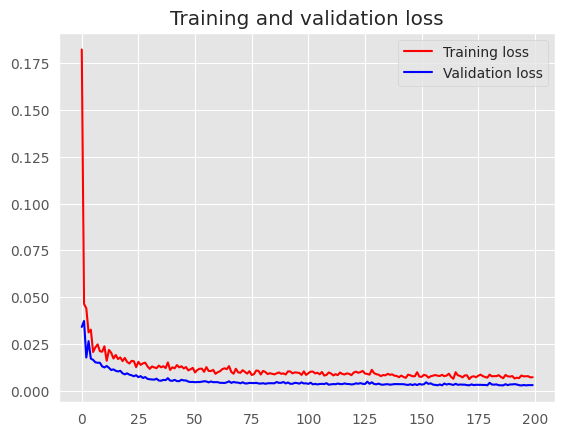

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot a the graph to show the descent of the training and validation losses
loss = history_gru_lstm.history['loss']
val_loss = history_gru_lstm.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Prediction using gru-lstm model
train_predict=model_gru_lstm.predict(X_train)
test_predict=model_gru_lstm.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 8ms/step


((146, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### **Model Evaluation**

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

Train Data
RMSE:  3.5839383178478292
MSE:  12.844613866137927
MAE:  2.7637897801998603
-------------------------------------------------------------------------------------
Test Data
RMSE:  2.7345640821657744
MSE:  7.4778407194711445
MAE:  2.149748930324978


In [ ]:
# The Variance Regression Score
print("Train data explained variance score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance score: 0.8735621467926795
Test data explained variance score: 0.934391985801463


In [ ]:
# R-Squared score for regression 
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8735190444658125
Test data R2 score: 0.9337798291136667


In [ ]:
# The mean gamma deviance and mean poisson deviance scores
print("Train")
print("Data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))

print("----------------------------------------------------------------------")
print("Test")
print("Data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train
Data MGD:  0.0005802313370626452
Data MPD:  0.0861825794441357
----------------------------------------------------------------------
Test
Data MPD:  0.0530014932413773
Data MGD:  0.0003776773573592555


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

Train predicted data:  (250, 1)


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (250, 1)


In [ ]:
# Create a dataframe of the date, close price, train predicted close price and the test predicted close price
plotdf = pd.DataFrame({'date': df_stock['date'],
                       'original_close': df_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Make the plottings with date on the x axis and (original_close, train_predicted_close, test_predicted_close) on the y axis
fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### **Predict next 30 days**

In [ ]:
# Define the temp_input
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# Create a while loop to move predict the next 30 days
gru_lstm_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days): # while i is less than 30 
    
    if(len(temp_input)>time_step): # if the length of temp_input greater than the time_step(15)
        
        x_input=np.array(temp_input[1:]) # Convert to a numpy array
        x_input = x_input.reshape(1,-1) # Reshape to a 1 x 14 array
        x_input = x_input.reshape((1, n_steps, 1)) # Reshape to a three dim
        
        yhat = model_gru_lstm.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        temp_input=temp_input[1:] # move the set one step forward
        
       
        gru_lstm_output.extend(yhat.tolist()) #add the predicted value to the gru_lstm_output
        i=i+1  # perfore the process over again
        
    else: # the length of temp_input between 1 - 14
        
        x_input = x_input.reshape((1, n_steps,1)) #reshape the x_input into a 3 dim
        yhat = model_gru_lstm.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        
        gru_lstm_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(gru_lstm_output)) # Print the output of the length of gru_lstm_output

Output of predicted next days:  30


In [ ]:
gru_lstm_df=df.tolist() # Convert the dataframe to a list and assign it as lstmdf
gru_lstm_df.extend((np.array(gru_lstm_output).reshape(-1,1)).tolist()) # Add the prediction for 30 days forward
gru_lstm_df=scaler.inverse_transform(gru_lstm_df).reshape(1,-1).tolist()[0] # Transform back to the real values without normalization

names = cycle(['Close price'])

figure = px.line(gru_lstm_df,labels={'value': 'Stock price','index': 'Timestamp'})
figure.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

figure.for_each_trace(lambda t:  t.update(name = next(names)))

figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

## **LSTM-GRU**

### **Process**

In [ ]:
# Build the LSTM - GRU model 
model_lstm_gru =Sequential()
model_lstm_gru.add(LSTM(64,return_sequences=True,input_shape=(time_step,1)))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(LSTM(64,return_sequences=True))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(GRU(32))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(Dense(1, activation = "relu"))
model_lstm_gru.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# view the model summay
model_lstm_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 15, 64)            16896     
                                                                 
 dropout_6 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_7 (Dropout)         (None, 15, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
history_lstm_gru = model_lstm_gru.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 8s 344ms/step - loss: 0.1540 - val_loss: 0.0215
Epoch 2/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0425 - val_loss: 0.0226
Epoch 3/200
5/5 [==============================] - 0s 46ms/step - loss: 0.0323 - val_loss: 0.0298
Epoch 4/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0402 - val_loss: 0.0267
Epoch 5/200
5/5 [==============================] - 0s 45ms/step - loss: 0.0329 - val_loss: 0.0197
Epoch 6/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0300 - val_loss: 0.0198
Epoch 7/200
5/5 [==============================] - 0s 42ms/step - loss: 0.0267 - val_loss: 0.0193
Epoch 8/200
5/5 [==============================] - 0s 47ms/step - loss: 0.0239 - val_loss: 0.0191
Epoch 9/200
5/5 [==============================] - 0s 45ms/step - loss: 0.0271 - val_loss: 0.0185
Epoch 10/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0258 - val_loss: 0.0182
Epoch 11/200
5/5 [

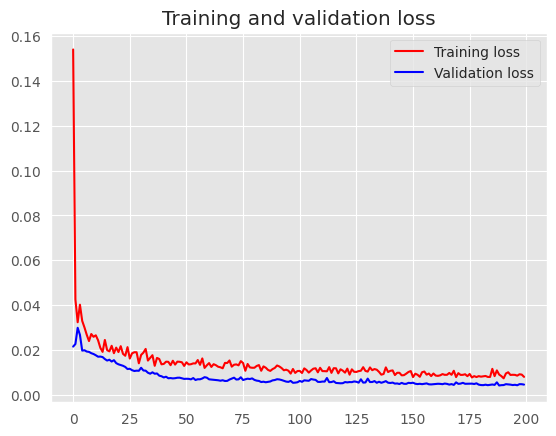

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot a the graph to show the descent of the training and validation losses
loss = history_lstm_gru.history['loss']
val_loss = history_lstm_gru.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Prediction using gru-lstm model
train_predict=model_lstm_gru.predict(X_train)
test_predict=model_lstm_gru.predict(X_test)
train_predict.shape, test_predict.shape # Print the shape of the predicted values

3/3 [==============================] - 0s 9ms/step


((146, 1), (72, 1))

In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### **Model Evaluation**

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

Train Data
RMSE:  3.885830325640151
MSE:  15.099677319664645
MAE:  3.0686216116224303
-------------------------------------------------------------------------------------
Test Data
RMSE:  3.361951280953823
MSE:  11.302716415507051
MAE:  2.621283503336589


In [ ]:
# The Variance Regression Score
print("Train data explained variance score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance score: 0.8516799963908794
Test data explained variance score: 0.9002357262773307


In [ ]:
# R-Squared score for regression 
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8513134271257529
Test data R2 score: 0.8999085644381611


In [ ]:
# The mean gamma deviance and mean poisson deviance scores
print("Train")
print("Data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))

print("----------------------------------------------------------------------")
print("Test")
print("Data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train
Data MGD:  0.0006824969830095844
Data MPD:  0.1013484736817913
----------------------------------------------------------------------
Test
Data MPD:  0.07985484517134564
Data MGD:  0.0005670457354210888


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

Train predicted data:  (250, 1)


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (250, 1)


In [ ]:
# Create a dataframe of the date, close price, train predicted close price and the test predicted close price
plotdf = pd.DataFrame({'date': df_stock['date'],
                       'original_close': df_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Make the plottings with date on the x axis and (original_close, train_predicted_close, test_predicted_close) on the y axis
fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### **Predict next 30 days**

In [ ]:
# Define the temp_input
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# Create a while loop to move predict the next 30 days
lstm_gru_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days): # while i is less than 30 
    
    if(len(temp_input)>time_step): # if the length of temp_input greater than the time_step(15)
        
        x_input=np.array(temp_input[1:]) # Convert to a numpy array
        x_input = x_input.reshape(1,-1) # Reshape to a 1 x 14 array
        x_input = x_input.reshape((1, n_steps, 1)) # Reshape to a three dim
        
        yhat = model_lstm_gru.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        temp_input=temp_input[1:] # move the set one step forward
        
       
        lstm_gru_output.extend(yhat.tolist()) #add the predicted value to the gru_lstm_output
        i=i+1  # perform the process over again
        
    else: # the length of temp_input between 1 - 14
        
        x_input = x_input.reshape((1, n_steps,1)) #reshape the x_input into a 3 dim
        yhat = model_lstm_gru.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        
        lstm_gru_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lstm_gru_output)) # Print the output of the length of gru_lstm_output

Output of predicted next days:  30


In [ ]:
lstm_gru_df=df.tolist() # Convert the dataframe to a list and assign it as lstm_gru_df
lstm_gru_df.extend((np.array(gru_lstm_output).reshape(-1,1)).tolist()) # Add the prediction for 30 days forward
lstm_gru_df=scaler.inverse_transform(lstm_gru_df).reshape(1,-1).tolist()[0] # Transform back to the real values without normalization

names = cycle(['Close price'])

figure = px.line(lstm_gru_df,labels={'value': 'Stock price','index': 'Timestamp'})
figure.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

figure.for_each_trace(lambda t:  t.update(name = next(names)))

figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

## **Regularized-GRU-LSTM**

### **Process**

In [ ]:
# Import the regularizers 
from keras.regularizers import l1, l2
from keras import regularizers
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [ ]:
# Build the Regularized LSTM - GRU model
model_gru_lstm_reg = Sequential()
model_gru_lstm_reg.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model_gru_lstm_reg.add(Dropout(0.2))
model_gru_lstm_reg.add(GRU(64,return_sequences=True))
model_gru_lstm_reg.add(Dropout(0.2))
model_gru_lstm_reg.add(LSTM(32, kernel_regularizer = regularizers.l2(0.001)))
model_gru_lstm_reg.add(Dropout(0.2))
model_gru_lstm_reg.add(Dense(1, activation = "relu"))
model_gru_lstm_reg.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
# view the model summay
model_gru_lstm_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 15, 64)            12864     
                                                                 
 dropout_9 (Dropout)         (None, 15, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 15, 64)            24960     
                                                                 
 dropout_10 (Dropout)        (None, 15, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
history_gru_lstm_reg = model_gru_lstm_reg.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 10s 523ms/step - loss: 0.5020 - val_loss: 0.2671
Epoch 2/200
5/5 [==============================] - 0s 95ms/step - loss: 0.2403 - val_loss: 0.2023
Epoch 3/200
5/5 [==============================] - 0s 84ms/step - loss: 0.2236 - val_loss: 0.1949
Epoch 4/200
5/5 [==============================] - 0s 98ms/step - loss: 0.2013 - val_loss: 0.1823
Epoch 5/200
5/5 [==============================] - 0s 91ms/step - loss: 0.1903 - val_loss: 0.1645
Epoch 6/200
5/5 [==============================] - 0s 83ms/step - loss: 0.1856 - val_loss: 0.1749
Epoch 7/200
5/5 [==============================] - 0s 96ms/step - loss: 0.1892 - val_loss: 0.1594
Epoch 8/200
5/5 [==============================] - 0s 86ms/step - loss: 0.1778 - val_loss: 0.1488
Epoch 9/200
5/5 [==============================] - 0s 82ms/step - loss: 0.1753 - val_loss: 0.1515
Epoch 10/200
5/5 [==============================] - 1s 128ms/step - loss: 0.1780 - val_loss: 0.1495
Epoch 11/200
5/5

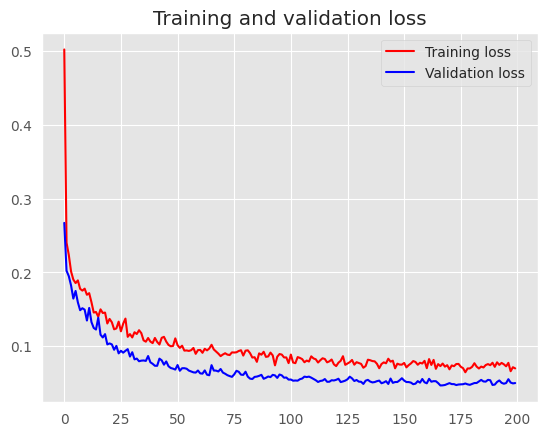

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot a the graph to show the descent of the training and validation losses
loss = history_gru_lstm_reg.history['loss']
val_loss = history_gru_lstm_reg.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Prediction using gru-lstm model
train_predict=model_gru_lstm_reg.predict(X_train)
test_predict=model_gru_lstm_reg.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 8ms/step


((146, 1), (72, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### **Model Evaluation**

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test Data")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))

Train Data
RMSE:  3.6876129903059987
MSE:  13.59848956627355
MAE:  2.88822029807898
-------------------------------------------------------------------------------------
Test Data
RMSE:  2.832539661159202
MSE:  8.023280932039889
MAE:  2.2567775156385625


In [ ]:
# The Variance Regression Score
print("Train data explained variance score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance score: 0.8737936462086993
Test data explained variance score: 0.9301190569191279


In [ ]:
# R-Squared score for regression 
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8660956279348937
Test data R2 score: 0.9289496721954361


In [ ]:
# The mean gamma deviance and mean poisson deviance scores
print("Train")
print("Data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))

print("----------------------------------------------------------------------")
print("Test")
print("Data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("Data MGD: ", mean_gamma_deviance(original_ytest, test_predict))

Train
Data MGD:  0.0006087311601277939
Data MPD:  0.090818322908628
----------------------------------------------------------------------
Test
Data MPD:  0.055958545194032344
Data MGD:  0.0003925440698302165


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

Train predicted data:  (250, 1)


In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (250, 1)


In [ ]:
# Create a dataframe of the date, close price, train predicted close price and the test predicted close price
plotdf = pd.DataFrame({'date': df_stock['date'],
                       'original_close': df_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Make the plottings with date on the x axis and (original_close, train_predicted_close, test_predicted_close) on the y axis
fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### **Predict next 30 days**

In [ ]:
# Define the temp_input
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# Create a while loop to move predict the next 30 days
gru_lstm_reg_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days): # while i is less than 30 
    
    if(len(temp_input)>time_step): # if the length of temp_input greater than the time_step(15)
        
        x_input=np.array(temp_input[1:]) # Convert to a numpy array
        x_input = x_input.reshape(1,-1) # Reshape to a 1 x 14 array
        x_input = x_input.reshape((1, n_steps, 1)) # Reshape to a three dim
        
        yhat = model_gru_lstm_reg.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        temp_input=temp_input[1:] # move the set one step forward
        
       
        gru_lstm_reg_output.extend(yhat.tolist()) #add the predicted value to the gru_lstm_output
        i=i+1  # perfore the process over again
        
    else: # the length of temp_input between 1 - 14
        
        x_input = x_input.reshape((1, n_steps,1)) #reshape the x_input into a 3 dim
        yhat = model_gru_lstm_reg.predict(x_input, verbose=0) # apply the model in predicting to obtain the predicted value yhat
        temp_input.extend(yhat[0].tolist()) # append the predicted value to the temp_input
        
        gru_lstm_reg_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(gru_lstm_reg_output)) # Print the output of the length of gru_lstm_output

Output of predicted next days:  30


In [ ]:
gru_lstm_reg_df=df.tolist() # Convert the dataframe to a list and assign it as lstmdf
gru_lstm_reg_df.extend((np.array(gru_lstm_reg_output).reshape(-1,1)).tolist()) # Add the prediction for 30 days forward
gru_lstm_reg_df=scaler.inverse_transform(gru_lstm_reg_df).reshape(1,-1).tolist()[0] # Transform back to the real values without normalization

names = cycle(['Close price'])

figure = px.line(gru_lstm_reg_df,labels={'value': 'Stock price','index': 'Timestamp'})
figure.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

figure.for_each_trace(lambda t:  t.update(name = next(names)))

figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

## **CNN_LSTM**

### **Process**

In [ ]:
df = data

In [ ]:
#from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3945
987


In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(3945, 1, 100, 1)
(987, 1, 100, 1)
(3945, 1, 1)
(987, 1, 1)


In [ ]:
# Creating the Neural Network model here...
# CNN layers
model_cnn_lstm =Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
#model_cnn_lstm.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model_cnn_lstm.add(Bidirectional(LSTM(100, return_sequences=True)))
model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(Bidirectional(LSTM(100, return_sequences=False)))
model_cnn_lstm.add(Dropout(0.5))

#Final layers
model_cnn_lstm.add(Dense(1, activation='relu'))
model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit the model
history_cnn_lstm = model_cnn_lstm.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

In [ ]:
# After the model has been constructed, we'll summarise it
print(model_cnn_lstm.summary())
plot_model(model_cnn_lstm, to_file='model_cnn_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
#figure = fig(20, 20)
plt.plot(history_cnn_lstm.history['loss'], label='train loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history_cnn_lstm.history['mse'], label='train mse')
plt.plot(history_cnn_lstm.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(history_cnn_lstm.history['mae'], label='train mae')
plt.plot(history_cnn_lstm.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

### **Model Evaluation**

In [ ]:
result = model_cnn_lstm.evaluate(test_X, test_Y)
result

In [ ]:
# print the metrics
print("Test Data")
print("Loss: ", result[0])
print("MSE: ", result[1])
print("RMSE: ", math.sqrt(result[1]))
print("MAE: ", result[2])

In [ ]:
#import the libraries 
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

In [ ]:


# predict probabilities for test set
yhat_probs = model_cnn_lstm.predict(test_X, verbose=0)

#Make a copy of it 
predicted = yhat_probs.copy()

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

In [ ]:
predicted.shape

In [ ]:
yhat_probs.shape

### **Visualizing the Predictions**

In [ ]:
# visualize the predictions
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()